# Plateforme d'Acquisition et de Traitement Automatisé des Textes
### Carnet d'expérimentation
---

## Sujet : Expérience ObsInfo2307

---

# Imports

In [1]:
cd ../..

/Volumes/Geek/Work/Patat


In [2]:
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

In [3]:
pd.set_option('display.precision',2)

# Chargement Données

In [4]:
import patat.util.gsheet

gs = patat.util.gsheet.GoogleSheet()

sheet_id = '1KOACo0zR52LZuT2wMSc2a4_vePWC5K2RAyw_0x2Hvjw'
range_name = 'Data'

df_obsinfo = gs.read_df(sheet_id,range_name)

In [5]:
labels = [
    'infox',
    'lieux, dates et personnes',
    'faits',
    'opinions',
    'subjectif',
    'propos rapporté',
    'sources citées',
    'fausse nouvelle',
    'insinuation',
    'exagération',
    'titre décalé',
]

In [6]:
import numpy as np

In [7]:
def normalize(x):
    if x == '0':
        return 0.0
    elif x== '1':
        return 1.0
    else:
        return np.NaN

In [8]:
for label in labels:
    df_obsinfo[label]=df_obsinfo[label].apply(normalize)

In [9]:
df_obsinfo['url_h'] = df_obsinfo['url_labelizer'].apply(lambda s: s[-40:])

In [10]:
df_obsinfo

,url_labelizer,title,infox,"lieux, dates et personnes",faits,opinions,subjectif,propos rapporté,sources citées,fausse nouvelle,insinuation,exagération,titre décalé,commentaires,observateur,url_h
0,https://app.observatoire.info/labelize?url_h=c...,La relation entre la technologie et la religion,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,vraiment indigeste pour commencer !,FB,c13175936764a345ec21bc398fe750a41496078e
1,https://app.observatoire.info/labelize?url_h=0...,"Confinement. Les habitants de Brest, Morlaix e...",0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,,FB,0552561b3c46f64febfbc3a77c301f085a98b966
2,https://app.observatoire.info/labelize?url_h=3...,La Chine : Le premier marché mondial de Smartp...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,,FB,361a904687dd4b1abb189717de7341ce162d21c7
3,https://app.observatoire.info/labelize?url_h=4...,"Emmanuel à Olivier : « Tiens bon, on les aura ...",1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,Article dupliqué (je l'avais manqué),FB,433b403d386d5eba5dff7d45044cdb0fe7862972
4,https://app.observatoire.info/labelize?url_h=3...,"Selon UBS, les « propriétés d’assurance tant d...",0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,,FB,3494ad0901a73fc6ceb2f74ac4ac1930af42b363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,https://app.observatoire.info/labelize?url_h=d...,Loi climat : le gouvernement va exempter Amazo...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,,GP,d04a526d60fa6d67f61c7abcaf45092b8217a24d
896,https://app.observatoire.info/labelize?url_h=1...,Le QI peut-il être augmenté par l’éducation ? ...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,,GP,14ed4715949dc7767359674df1a076bb1e0e417b
897,https://app.observatoire.info/labelize?url_h=2...,Secte sexuelle : l’ex-star de Smallville Aliso...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,GP,2841a1db742a25419c20d4a56eb65d8c05d92f65
898,https://app.observatoire.info/labelize?url_h=7...,Sacre de Charles III par SAR le Prince Charles...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,,GP,7f8a6372ed4084fc88263c03e3b9186f082e2162


In [11]:
df_obsinfo[labels].isna().sum()

infox                        0
lieux, dates et personnes    0
faits                        0
opinions                     0
subjectif                    0
propos rapporté              0
sources citées               0
fausse nouvelle              0
insinuation                  0
exagération                  0
titre décalé                 0
dtype: int64

### Constats
- 100 articles
- 11 labels
- 9 observateurs
- Tous les labels sont remplis pour tous les articles

# Introduction 
## Annotation moyenne et Accord
Pour chaque label et chaque article on calcule :
- L'**annotation moyenne** = moyenne des annonations de l'ensemble des observateurs
- Le **score d'accord** = `abs(2*moyenne)-1`
    - Vaut 1 si tous les observateurs donnent le meme label
    - Vaut 0 si 50% de 0 et 50% de 1

Scores d'Accord pour 9 observateurs
- 5/9 -> 0.11
- 6/9 -> 0.33
- 7/9 -> 0.56
- 8/9 -> 0.78
- 9/9 -> 1.00

Ces métriques servent de base à l'étude des résultats suivant 3 axes:
- Analyse par Label
- Analyse par Article
- Analyse par Observateur

In [12]:
df_mean = df_obsinfo.pivot_table(index='title',values=labels,aggfunc='mean')

In [13]:
df_accord = df_mean.apply(lambda x : abs(2*x-1))

In [14]:
df_accord

,exagération,faits,fausse nouvelle,infox,insinuation,"lieux, dates et personnes",opinions,propos rapporté,sources citées,subjectif,titre décalé
title,,,,,,,,,,,
"""On ne peut plus accepter ces mensonges d'État"" Christian Perronne",0.78,1.00,0.33,1.00,0.33,1.00,1.00,0.11,0.78,1.00,0.78
"""Tully"": Charlize Theron super-maman (critique)",1.00,0.78,1.00,1.00,1.00,0.56,1.00,0.56,0.11,0.33,1.00
24 juillet : nouvelles manifestations nationales contre le passe sanitaire,0.11,1.00,0.78,0.56,0.11,1.00,0.78,0.56,0.11,0.78,1.00
"70 000 personnes manifestent à Prague contre le gouvernement tchèque, l’UE et l’OTAN",1.00,1.00,1.00,1.00,0.78,1.00,0.33,0.56,0.78,1.00,1.00
"Affluence en baisse au Carnaval de Nice, sept mois après un attentat très meurtrier",0.78,1.00,1.00,0.78,0.78,1.00,0.11,0.56,0.33,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...
"[Entretien exclusif] Helen Joyce : « Aujourd’hui, on demande aux enseignants d’apprendre aux enfants ce que signifie être un garçon ou une fille en les faisant se questionner sur leur identité de genre »",0.11,0.78,0.33,0.11,0.11,0.56,1.00,1.00,0.33,0.33,0.78
"[Tribune] En pleine affaire Ocean Viking, le passeur Cédric Herrou va rencontrer des lycéens !",0.78,1.00,0.33,0.33,0.11,1.00,1.00,0.78,0.33,1.00,0.78
"« Grand remplacement », « Français de papier »… Pécresse manque d’idées et pioche dans les idées de « l’extrême droite »",0.56,1.00,0.78,0.56,0.11,0.78,1.00,0.11,0.78,1.00,1.00


# Analyse par labels

## Sommes des Moyennes

In [15]:
mean_sum = pd.DataFrame(df_mean.sum(),columns=['mean']).sort_values('mean')
mean_sum

,mean
titre décalé,9.67
fausse nouvelle,22.22
propos rapporté,29.78
infox,37.44
exagération,45.33
insinuation,46.33
subjectif,60.56
sources citées,69.56
opinions,72.89
"lieux, dates et personnes",90.33


<Axes: >

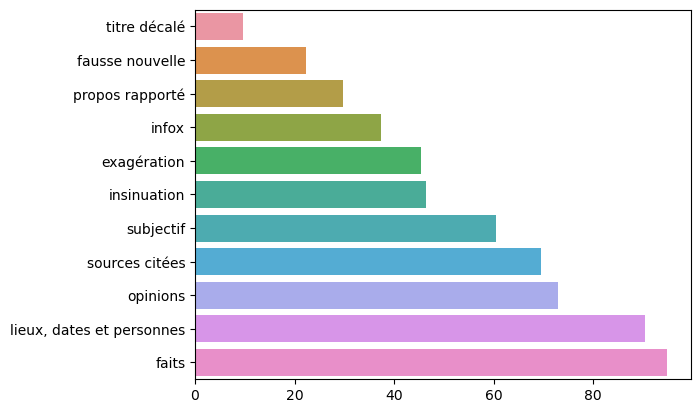

In [16]:
sns.barplot(mean_sum.T,orient="h")

### Constats
- Pas de répartition uniforme par label : Certains sont plus souvent à 0, d'autres plus souvent à 1
    - titre décalé : 10% de 1
    - fausse nouvelle : 23% de 1
    - Lieux dates et personnes : 94% de 1
    - faits : 95 %
### Conclusions
- Le label fait étant à 1 dans 95% des cas n'est peut être pas significatif, peut être faut il l'écarter


## Sommes des Accords

In [17]:
accord_sum = pd.DataFrame(df_accord.sum(),columns=['sum']).sort_values('sum')
accord_sum

,sum
insinuation,52.00
sources citées,57.33
propos rapporté,57.33
exagération,64.00
infox,64.89
opinions,69.33
fausse nouvelle,70.00
subjectif,72.22
"lieux, dates et personnes",80.89
titre décalé,81.78


<Axes: >

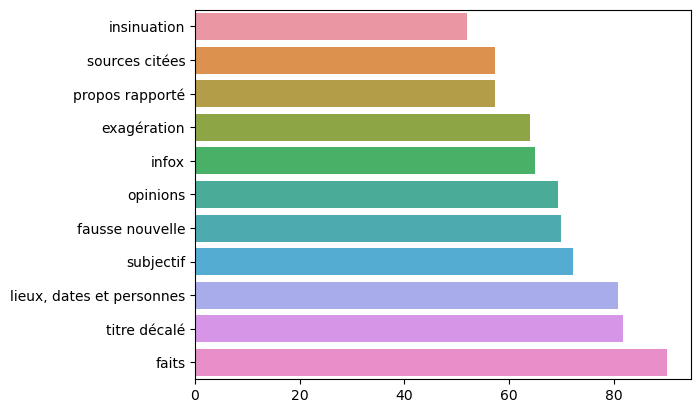

In [18]:
sns.barplot(accord_sum.T,orient="h")

### Constats
- Les observateurs sont plus souvent en accord sur :
    - faits : 90
    - titre décalé : 82
    - Lieu date personne : 81
- Et plus souvent partagés sur :
    - insinuation	52
    - sources citées	57
    - propos rapporté	57

### Conclusions
- 2 observateurs ne vont pas forcément donner la meme valeur à un label donné pour un article donné.
- Divergences plus marquées pour certains labels (insinuation, source citées, propos raportés) que pour d'autres (faits)


## Comptage accords par nombre de voix pour atteindre la majorité


In [19]:
print("Scores d'Accord pour 9 observateurs")
for i in range(5,10):
    print(f'{i}/9 = {(i/9-0.5)*2:.2f}')

Scores d'Accord pour 9 observateurs
5/9 = 0.11
6/9 = 0.33
7/9 = 0.56
8/9 = 0.78
9/9 = 1.00


In [20]:
df_details = pd.DataFrame()
for i in range(5,10):
    threshold = (i/9-0.5)*2
    df_details[i] = pd.DataFrame(df_accord.apply(lambda x: x==threshold).sum(),columns=['count']).sort_values('count')

In [21]:
df_details.sort_values(5,ascending=False)

,5,6,7,8,9
sources citées,23,13,12,17,27
insinuation,22,15,16,10,16
exagération,21,7,15,10,34
opinions,15,3,18,18,39
propos rapporté,14,2,40,2,18
infox,12,10,17,9,33
fausse nouvelle,11,3,17,3,39
subjectif,11,9,11,12,45
titre décalé,5,1,13,0,52
"lieux, dates et personnes",4,6,19,14,57


In [22]:
df_details['low'] = df_details[5]+df_details[6]
df_details['high'] = df_details[7]+df_details[8]+df_details[9]

In [23]:
df_details.sort_values('high',ascending=False)

,5,6,7,8,9,low,high
faits,2,2,7,16,73,4,96
"lieux, dates et personnes",4,6,19,14,57,10,90
opinions,15,3,18,18,39,18,75
subjectif,11,9,11,12,45,20,68
titre décalé,5,1,13,0,52,6,65
propos rapporté,14,2,40,2,18,16,60
fausse nouvelle,11,3,17,3,39,14,59
infox,12,10,17,9,33,22,59
exagération,21,7,15,10,34,28,59
sources citées,23,13,12,17,27,36,56


### Constats
#### Unanimité
- Il n'y a unanimité sur aucun label
- Le meilleur score d'unanimité est pour **faits** avec 73%
- Les moins bon scores sont insinuation et propos raportés
#### Accord relatif = high = 7/9 + 8/9 + 9/9
- Bon scores high pour faits et lieux dates personnes
- infox : Seulement 59% de high : la notion n'est pas clairement définie
#### Division = low = 5/9 + 6/9
- Les labels qui divisent le plus sont insinuation (37%) et sources citées (36%)
### Conclusion
- Biais de compréhension possible
    - Pour le label source citées par exemple

## Polarité des accords

In [24]:
df_details['moyenne']=df_mean.sum()
df_details['accord']=df_accord.sum()
df_details['label']=df_details.index

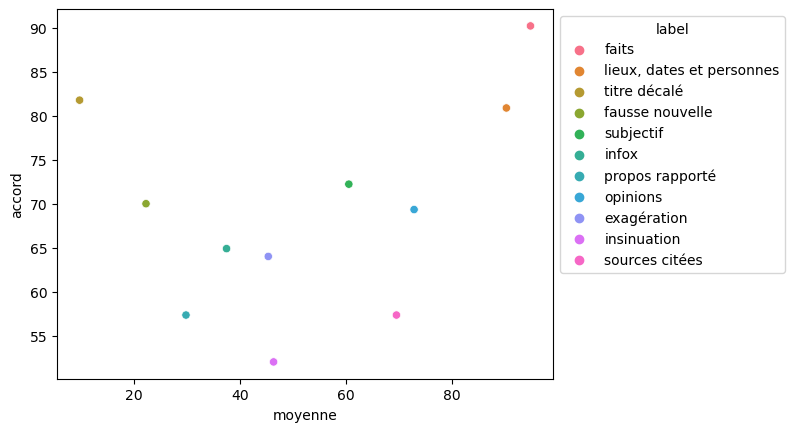

In [25]:
ax = sns.scatterplot(df_details,x='moyenne',y='accord',hue='label')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

### Constats
La courbe a une forme de U :
- L'accord est plus élevé pour les moyennes extrèmes
- L'accord est plus bas pour les moyennes "moyennes"
### Conclusions
Les observateurs sont plus souvents en accord sur les labels qui ont plus souvent les meme valeurs

# Analyse par articles

## Moyenne des accords des 11 labels

In [26]:
df_accord_articles=pd.DataFrame(df_accord.T.mean().sort_values(),columns=['accord_mean'])

In [27]:
df_accord_articles.sort_values('accord_mean')

,accord_mean
title,
Ursula von der Leyen menace les Italiens à la veille des élections,0.39
Un couple loge une famille de migrants : 36.000 € de dégâts,0.39
L’ouverture des sceaux de l’Apocalypse,0.41
L’avortement médicalement assisté ne sauve pas la vie des femmes,0.45
"[Entretien exclusif] Helen Joyce : « Aujourd’hui, on demande aux enseignants d’apprendre aux enfants ce que signifie être un garçon ou une fille en les faisant se questionner sur leur identité de genre »",0.49
...,...
Un colonel de gendarmerie à la tête de la SPA pour ramener la paix,0.92
Suisse : une rentrée politique sous le signe du viol,0.92
"Beyrouth: jusqu’à 300 000 personnes sans domicile après les explosions, la moitié de la ville touchée",0.94


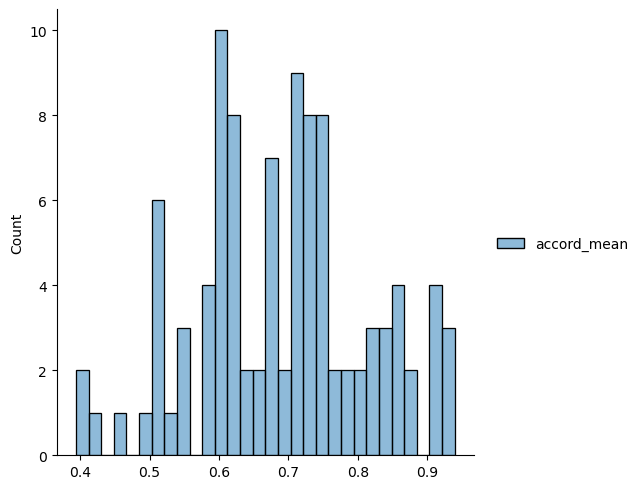

In [28]:
sns.displot(df_accord_articles,bins=30)

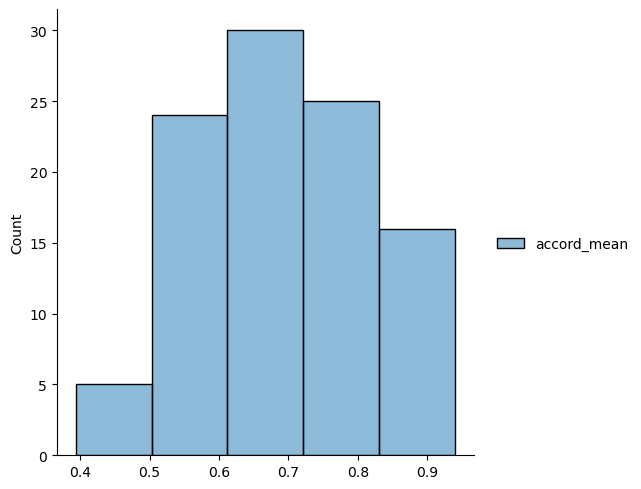

In [29]:
sns.displot(df_accord_articles,bins=5)

### Constats
- Distribution clairement décalée vers l'accord
- La plus petite moyenne est à 0.39, le minimum théorique est de 0.11
- Le meilleur accord est à 0.93 pour trois articles
### Conclusions
- Les observateurs ne sont pas en désacord sur tous les labels en meme temps

## Sous-ensemble de labels
On écarte volontairement les labels :
- Non significatifs : Trop souvent la meme valeur
- Observation biaisée : Le brief de lbelisation n'était pas clair

In [30]:
selected_labels = ['infox','opinions','subjectif','exagération','insinuation']

In [31]:
df_accord_articles = pd.DataFrame(df_accord[selected_labels].T.mean().sort_values(),columns=['accord'])

In [32]:
df_accord_articles.sort_values('accord').head(10)

,accord
title,
Ursula von der Leyen menace les Italiens à la veille des élections,0.16
L’avortement médicalement assisté ne sauve pas la vie des femmes,0.24
Mortalité du bétail et antenne-relais : une décision de justice inespérée,0.24
Vaccin anti-Covid : la descente aux enfers d’Eloïse,0.24
Les projets de démantèlement de la Russie,0.29
"Covid-19 : Spike, ARN et ""vaccins""… Et si on lançait les études préalables ?",0.29
Loi climat : le gouvernement va exempter Amazon et le e-commerce des fortes contraintes de la future loi,0.33
Un médecin de l’armée américaine révèle que les médecins ont reçu l’ordre de ne pas signaler les effets indésirables liés aux « vaccins » anti-Covid,0.33
"[Entretien exclusif] Helen Joyce : « Aujourd’hui, on demande aux enseignants d’apprendre aux enfants ce que signifie être un garçon ou une fille en les faisant se questionner sur leur identité de genre »",0.33


In [33]:
df_accord_articles.sort_values('accord').tail(10)

,accord
title,
"Point de situation au 06/12/21 au Centre hospitalier de Haguenau : sur 8 patients en réanimation, 7 sont vaccinés !",0.91
Le Sinn Fein en tête en Irlande du Nord,0.91
Un colonel de gendarmerie à la tête de la SPA pour ramener la paix,0.91
"Retraites: la CFDT-Cheminots appelle à la grève reconductible, faute d'engagements du gouvernement",0.91
Essonne : Les voleurs tombent sur des membres du GIGN qui sortaient de leur entraînement,0.96
"Bilar : « Nous approchons bien de l’échec et mat, si rien ne vient les en empêcher »",0.96
Voir les corrompus bien en face,0.96
"Beyrouth: jusqu’à 300 000 personnes sans domicile après les explosions, la moitié de la ville touchée",0.96
"Confinement. Les habitants de Brest, Morlaix et Carhaix invités à répondre à une étude sur leur consommation d’alcool",1.00


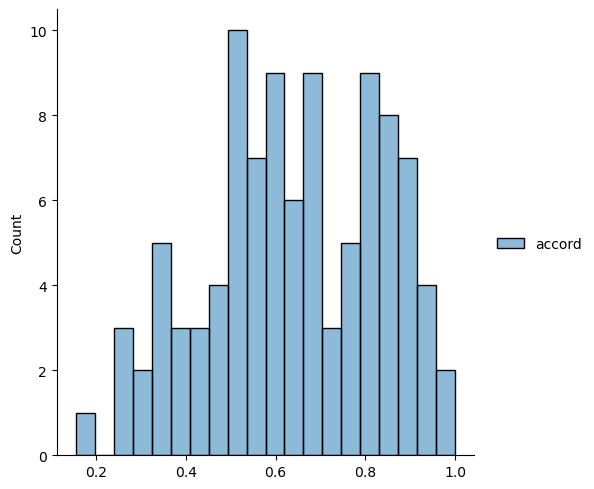

In [34]:
sns.displot(df_accord_articles,bins=20)

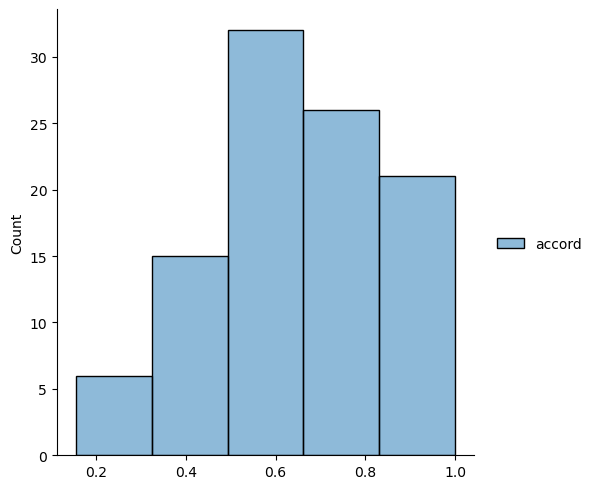

In [35]:
sns.displot(df_accord_articles,bins=5)

### Constats
- La plus petite moyenne est cette fois ci à 0.15, suivi de trois articles à 0.24
- Les données sont mieux distribuées que précédement, avec toujours un décalage vers l'accord
- Deux articles en accord parfait à 1, suivis de 4 articles à 0.95
### Conclusions
- Plus de valeurs extrèmes, la réduction du nombre de labels fait apparaitre plus de volatilité dans l'accord entre observateurs

## Selections des articles pour ObsInfo2309
- Articles avec le meilleur accord
- Articles avec le moins bon accord
- Annotation niveau paragraphe

In [36]:
df_urls=df_obsinfo[['title','url_h']][:100] 

In [37]:
df_urls = pd.merge(df_accord_articles,df_urls,on='title')

In [38]:
import patat.db.article_db
article_db = patat.db.article_db.ArticleDb()
df_corpus = article_db.df().copy()

df_articles = pd.merge(df_urls,df_corpus.drop(columns=['title']), on='url_h')

df_articles

,title,accord,url_h,url,site,article,author,date,tags,paragraphs,date_iso,abstract,c_count,p_count,predict_infox
0,Ursula von der Leyen menace les Italiens à la ...,0.16,ca79473bdf0650246530848ccc5e0672d3c6af4f,https://lalettrepatriote.com/ursula-von-der-le...,lalettrepatriote.com,"« Nous verrons le résultat du vote en Italie ,...",Didier Dewitte,,[],[« Nous verrons le résultat du vote en Italie ...,,,NaN,NaN,0.5
1,L’avortement médicalement assisté ne sauve pas...,0.24,1c3945456497c17700557d470a7ae7e26d435140,https://lesalonbeige.fr/lavortement-medicaleme...,lesalonbeige.fr,Intéressante analyse parue sur IFamNews :\nDep...,Par Michel Janva,26 mai 2023,[Culture de mort : Avortement],"[Intéressante analyse parue sur IFamNews :, De...",2023-05-26T18:25:41+02:00,,NaN,NaN,0.5
2,Mortalité du bétail et antenne-relais : une dé...,0.24,66b9cb7b592c322ab9e35348a884a3e22319d249,https://lezarceleurs.blogspot.com/2022/05/mort...,lezarceleurs.blogspot.com,NaN,NaN,NaN,[],[De : https://www.robindestoits.org/Mortalite-...,NaN,NaN,4376.0,9.0,0.5
3,Vaccin anti-Covid : la descente aux enfers d’E...,0.24,0d03c6039a656c62d79897a4641aa10e25cfdbe8,https://www.profession-gendarme.com/vaccin-ant...,www.profession-gendarme.com,NaN,NaN,NaN,['18 mai 2022 | \n\t\t\t\t\t\t\t\tCatégorie: A...,[Publié le 16/05/2022 à 18h45 • Mis à jour le ...,NaN,NaN,6458.0,21.0,0.5
4,Les projets de démantèlement de la Russie,0.29,2a5478f5ef32fabbc7f8421cdc7f944a1f3e5c59,https://reseauinternational.net/les-projets-de...,reseauinternational.net,La revue Conflits vient de publier une traduct...,,,"[États-Unis, OTAN/Russie, Russie, Faits d'actu...",[La revue Conflits vient de publier une traduc...,,,NaN,NaN,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Voir les corrompus bien en face,0.96,9d618d02c4805676d1b0b18602b8e8602a64e60f,https://reseauinternational.net/voir-les-corro...,reseauinternational.net,NaN,NaN,NaN,"[""Faits d'actu"", ""Faits d'actu"", ""Faits d'actu...","[par Gilbert Guingant., Lorsque l’ère bourgeoi...",NaN,NaN,22588.0,54.0,0.5
96,Essonne : Les voleurs tombent sur des membres ...,0.96,382bac9a954453809b94369c779d2a6ec96cc030,https://www.profession-gendarme.com/essonne-le...,www.profession-gendarme.com,NaN,NaN,NaN,['20 septembre 2019 | \n\t\t\t\t\t\t\t\tCatégo...,[Illustration. (Frederic Legrand – COMEO / Shu...,NaN,NaN,1429.0,8.0,0.5
97,Beyrouth: jusqu’à 300 000 personnes sans domic...,0.96,11de42d927cfed23cb71c7b9ff9b0302351fe523,https://reseauinternational.net/beyrouth-jusqu...,reseauinternational.net,NaN,NaN,NaN,"[""Faits d'actu"", ""Faits d'actu"", ""Faits d'actu...",[Jusqu’à 300 000 personnes se retrouvent sans ...,NaN,NaN,2073.0,7.0,0.5
98,"Confinement. Les habitants de Brest, Morlaix e...",1.00,0552561b3c46f64febfbc3a77c301f085a98b966,https://www.breizh-info.com/2021/01/27/157958/...,www.breizh-info.com,NaN,NaN,Le \n\t\t\t\t\t\t\t\t\t\t27 janvier 2021,"['BREST', 'CARHAIX', 'MORLAIX', 'alcool', 'bre...","[Dans le cadre du Dry January, opération comme...",2021-01-27T00:00:00,NaN,2669.0,13.0,0.5


In [39]:
df_articles['p_count']=df_articles['paragraphs'].apply(len)

<Axes: xlabel='accord', ylabel='p_count'>

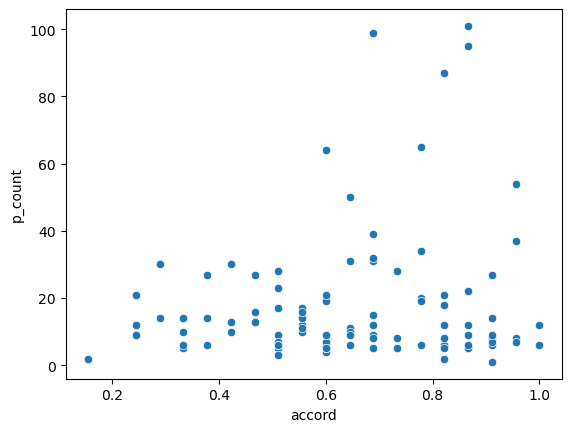

In [40]:
sns.scatterplot(df_articles,x='accord',y='p_count')

In [41]:
size = 10

In [42]:
df_articles.sort_values('accord').head(size)['p_count'].sum()

131

In [43]:
df_articles.sort_values('accord').tail(size)['p_count'].sum()

152

In [44]:
low_index = df_articles.sort_values('accord').head(10).index
high_index = df_articles.sort_values('accord').tail(10).index
df_selection = pd.concat([df_articles.loc[low_index],df_articles.loc[high_index]])

In [45]:
df_selection.to_pickle('data/tmp/230925-ObsInfo2309Selection.pkl')

# Analyse par observateurs
On compte pour chaque label, le nombre d'article à 1 pour chaque observateur

In [46]:
df_obs = df_obsinfo.pivot_table(index='observateur',aggfunc='sum')[labels]

In [66]:
df_obs = df_obs.sort_values('infox')

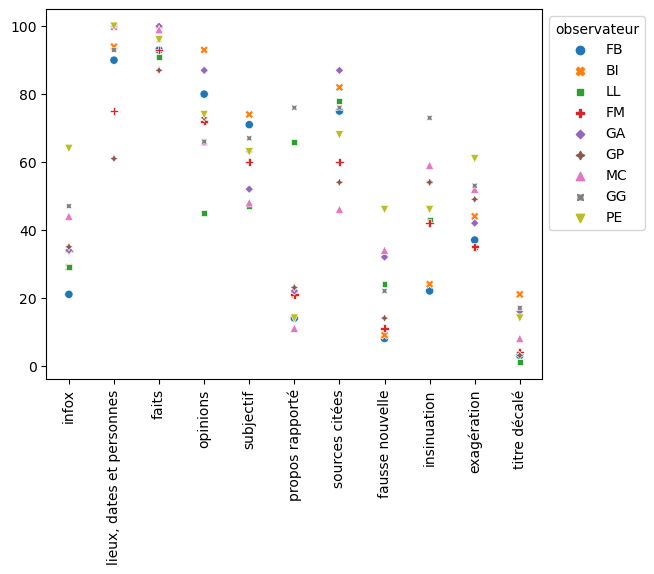

In [67]:
ax = sns.scatterplot(df_obs.T)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.tick_params(axis='x', rotation=90)

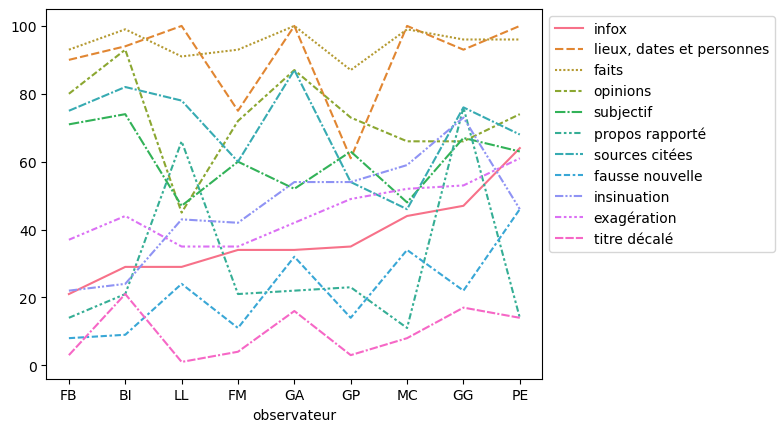

In [68]:
ax = sns.lineplot(df_obs)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [49]:
df_stat = (df_obs.describe().T).drop(columns=['count','25%','50%','75%'])

In [50]:
df_stat

,mean,std,min,max
infox,37.44,12.66,21.0,64.0
"lieux, dates et personnes",90.33,13.65,61.0,100.0
faits,94.89,4.28,87.0,100.0
opinions,72.89,13.82,45.0,93.0
subjectif,60.56,9.74,47.0,74.0
propos rapporté,29.78,23.87,11.0,76.0
sources citées,69.56,13.66,46.0,87.0
fausse nouvelle,22.22,13.10,8.0,46.0
insinuation,46.33,16.24,22.0,73.0
exagération,45.33,9.07,35.0,61.0


## Ecarts par label

In [51]:
df_stat['spread']=df_stat['max']-df_stat['min']

In [52]:
df_stat.sort_values('spread')

,mean,std,min,max,spread
faits,94.89,4.28,87.0,100.0,13.0
titre décalé,9.67,7.42,1.0,21.0,20.0
exagération,45.33,9.07,35.0,61.0,26.0
subjectif,60.56,9.74,47.0,74.0,27.0
fausse nouvelle,22.22,13.10,8.0,46.0,38.0
"lieux, dates et personnes",90.33,13.65,61.0,100.0,39.0
sources citées,69.56,13.66,46.0,87.0,41.0
infox,37.44,12.66,21.0,64.0,43.0
opinions,72.89,13.82,45.0,93.0,48.0
insinuation,46.33,16.24,22.0,73.0,51.0


<Axes: >

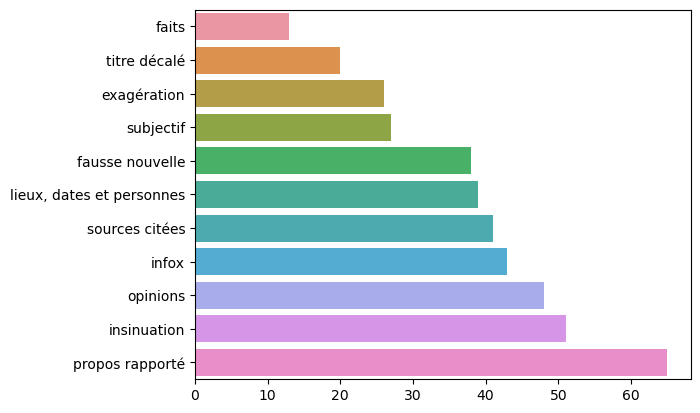

In [53]:
sns.barplot(pd.DataFrame(df_stat['spread']).sort_values('spread').T,orient='h')

### Constats
- Les écarts entre min et max peuvent aller jusqu'à 65%
### Conclusions
- Les observateurs ne labelisent pas de la meme manière pour la plupart des labels
- Explications possibles à explorer :
    - Sens différent apporté aux labels
    - Subjectivité des labels
    - Différence d'appréciation pour un texte complet, plutot qu'on paragraphe

<Axes: xlabel='observateur'>

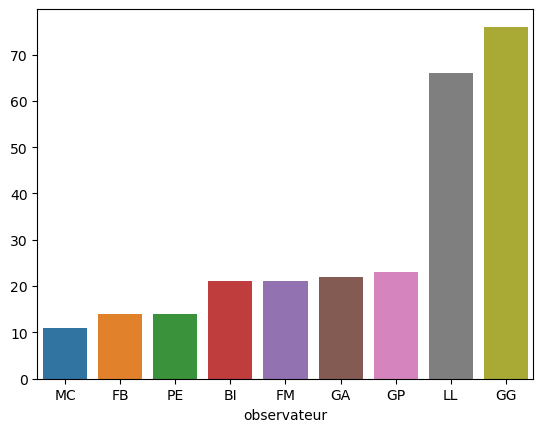

In [54]:
label = 'propos rapporté'
sns.barplot(pd.DataFrame(df_obs[label]).sort_values(label).T)

### Constats 
Label Propos Raportés
- LL et GG se démarquent clairement du reste du groupe qui semble relativement homogènes

<Axes: xlabel='observateur'>

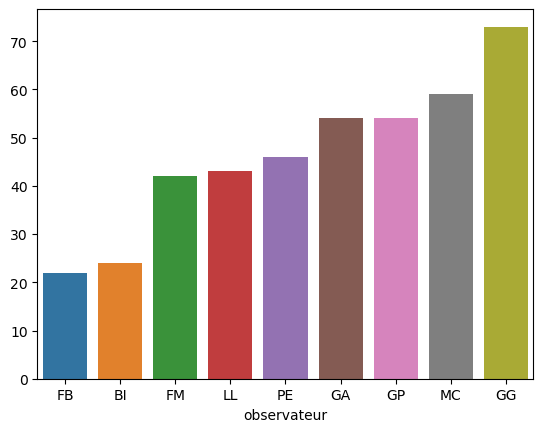

In [55]:
label = 'insinuation'
sns.barplot(pd.DataFrame(df_obs[label]).sort_values(label).T)

### Constats 
Label Insinuiation
- Un groupe moyen plus ou moins homogène
- FB et BI d'un coté et GG de l'autre qui se démarquent

<Axes: xlabel='observateur'>

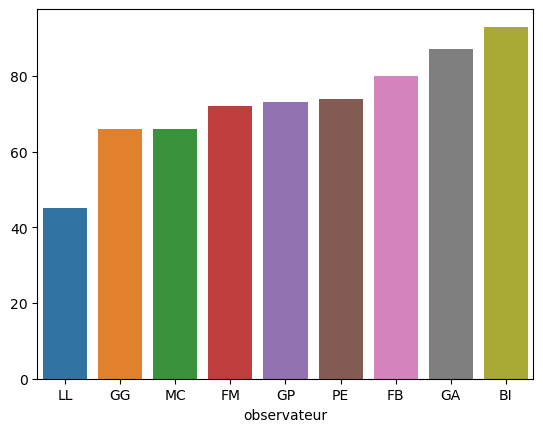

In [56]:
label = 'opinions'
sns.barplot(pd.DataFrame(df_obs[label]).sort_values(label).T)

### Constats 
Label Opinions
- répartition relativement homogène des observations
- LL se démarque sur la droite

<Axes: xlabel='observateur'>

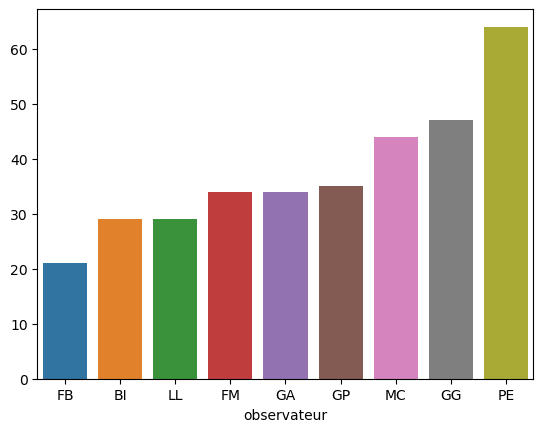

In [57]:
label = 'infox'
sns.barplot(pd.DataFrame(df_obs[label]).sort_values(label).T)

### Constats 
Label Infox
- PE se démarque sur la droite et FB sur la gauche

# Conclusions
## Résumé des constats
## Enseignements de l'expérience
## Prochaines étapes